In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
df = pd.read_csv("Classified Data", index_col=0)

In [19]:
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [20]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [17]:
scaler = StandardScaler()

In [21]:
scaler.fit(df.drop("TARGET CLASS", axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
scaled_data = scaler.transform(df.drop("TARGET CLASS", axis=1))
scaled_data

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [26]:
df_scaled = pd.DataFrame(scaled_data, columns= df.columns[:-1])
df_scaled.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [28]:
X = df_scaled
y = df["TARGET CLASS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [32]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [38]:
predictions = knn_model.predict(X_test)
# predictions

In [39]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[134   8]
 [ 11 147]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



**Investigate to find the proper choice of k**

In [96]:
avg_error_rate = []

for i in range(1,40):
    
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    
    predictions = knn_model.predict(X_test)
    avg_error_rate.append(np.mean(predictions != y_test)) # Works because these are NUMPY arrays!
    

In [97]:
avg_error_rate[:10]

[0.06333333333333334,
 0.08333333333333333,
 0.056666666666666664,
 0.056666666666666664,
 0.056666666666666664,
 0.056666666666666664,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.05]

Text(0, 0.5, 'Avg. Error Rate')

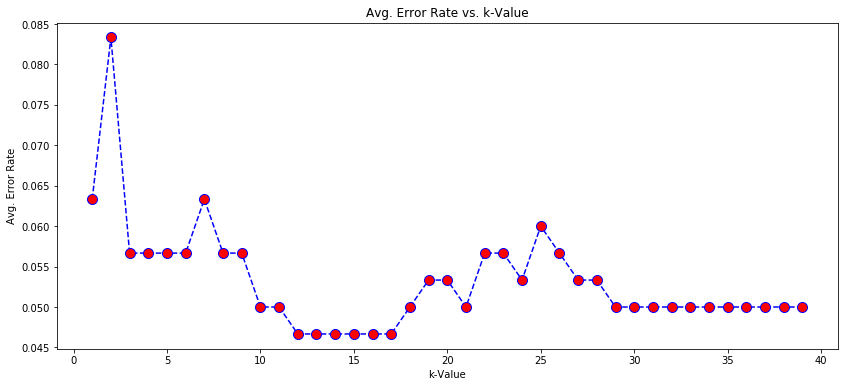

In [102]:
plt.figure(figsize=(14,6))
plt.plot(range(1,40), avg_error_rate, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)

plt.title("Avg. Error Rate vs. k-Value")
plt.xlabel("k-Value")
plt.ylabel("Avg. Error Rate")

In [103]:
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train, y_train)
predictions = knn_model.predict(X_test)

In [104]:
print(confusion_matrix(y_test, predictions))
print("\n\n\n")
print(classification_report(y_test, predictions))

[[136   6]
 [  8 150]]




              precision    recall  f1-score   support

           0       0.94      0.96      0.95       142
           1       0.96      0.95      0.96       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



This new model gives us better performance metrics!!! =D

Rough Work Below

In [66]:
error_rate = []
i=1

knn = KNeighborsClassifier(n_neighbors=i)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
error_rate.append(np.mean(pred != y_test))

In [90]:
type(pred) # the != code works because pred & y_test are NUMPY arrays, not regular Python arrays!!!

numpy.ndarray

In [68]:
y_test

521    0
737    1
740    1
660    1
411    0
      ..
468    1
935    1
428    0
7      0
155    0
Name: TARGET CLASS, Length: 300, dtype: int64

In [105]:
count=0
for i in range(len(y_test)):
    if (pred != y_test):
        count+=1

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [65]:
error_rate

[0.06333333333333334]

In [82]:
my_array = np.array([1,2,3,4,5])

In [86]:
another_array = np.array([41,42,3,4,5])

In [87]:
my_array == another_array

array([False, False,  True,  True,  True])

In [88]:
np.mean(my_array == another_array)

0.6